In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./input/pseudodata.csv", index_col=0)
df["LogReturn"].describe()

count    24460.000000
mean        -0.000070
std          0.005257
min         -0.075064
25%         -0.002259
50%          0.000013
75%          0.002158
max          0.080387
Name: LogReturn, dtype: float64

In [17]:
with open("./logs/2022-09-14-19-55-39.log") as F:
    result = F.read()
result = list(filter(lambda x: "Timestamp" in x, result.split('\n')))
result = list(map(lambda x: x.replace("]","").split(",")[-2:], result))
result = list(
    map(lambda x: (float(x[0]), float(x[1])), result)

)
df = pd.DataFrame(np.array(result), columns=["pred","truth"])

In [18]:
df["pred"].describe()

count    135.000000
mean       0.028353
std        0.379035
min       -1.000000
25%       -0.039545
50%        0.001698
75%        0.056878
max        1.000000
Name: pred, dtype: float64

<AxesSubplot:>

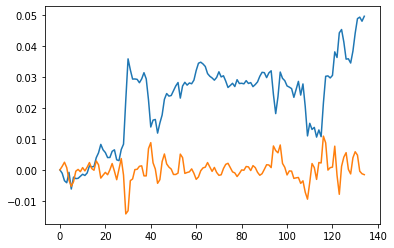

In [19]:
(-np.sign(df["pred"]) * df["truth"]).cumsum().plot()
df["truth"].plot()

In [20]:
(-np.sign(df["pred"]) == np.sign(df["truth"])).mean()

0.5481481481481482

<AxesSubplot:>

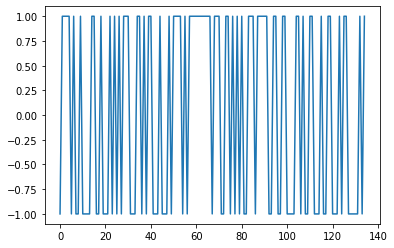

In [21]:
(np.sign(df["pred"])).plot()